### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import  accuracy_score,  r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings("ignore")

### **Getting Know About The Dataset**

In [2]:
df_x = pd.read_csv('exercise.csv')
df_y = pd.read_csv('calories.csv')

In [3]:
df_x.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
df_x.shape

(15000, 8)

In [5]:
df_y.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
df_y.shape

(15000, 2)

In [7]:
x_userid = df_x['User_ID'].tolist()
y_userid = df_y['User_ID'].tolist()

In [8]:
print(x_userid[0:10])

[14733363, 14861698, 11179863, 16180408, 17771927, 15130815, 19602372, 11117088, 12132339, 17964668]


In [9]:
print(y_userid[0:10])

[14733363, 14861698, 11179863, 16180408, 17771927, 15130815, 19602372, 11117088, 12132339, 17964668]


#### **Checking User ID's In Both Tables**

In [10]:
missing_id = 0
avl_id = 0

for i in x_userid:
  if i in y_userid:
    avl_id += 1

  else:
    missing_id += 1


print(missing_id)
print(avl_id)

0
15000


### **Join Tables**

In [11]:
df_new = df_x.join(df_y, on=None, how='inner', lsuffix='User_ID', rsuffix='User_ID', sort=False)

In [12]:
df_new.head()

,User_IDUser_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_IDUser_ID,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


In [13]:
df_new.drop(['User_IDUser_ID'],axis=1,inplace=True)

In [14]:
df_new.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [15]:
df_new.shape

(15000, 8)

In [16]:
df_new.dtypes

Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [17]:
df_new.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [18]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,42.789800,16.980264,20.0,28.0,39.0,56.0,79.0
Height,15000.0,174.465133,14.258114,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,74.966867,15.035657,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,15.530600,8.319203,1.0,8.0,16.0,23.0,30.0
Heart_Rate,15000.0,95.518533,9.583328,67.0,88.0,96.0,103.0,128.0
Body_Temp,15000.0,40.025453,0.779230,37.1,39.6,40.2,40.6,41.5
Calories,15000.0,89.539533,62.456978,1.0,35.0,79.0,138.0,314.0


## **Data Distribution**

In [19]:
df_new['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

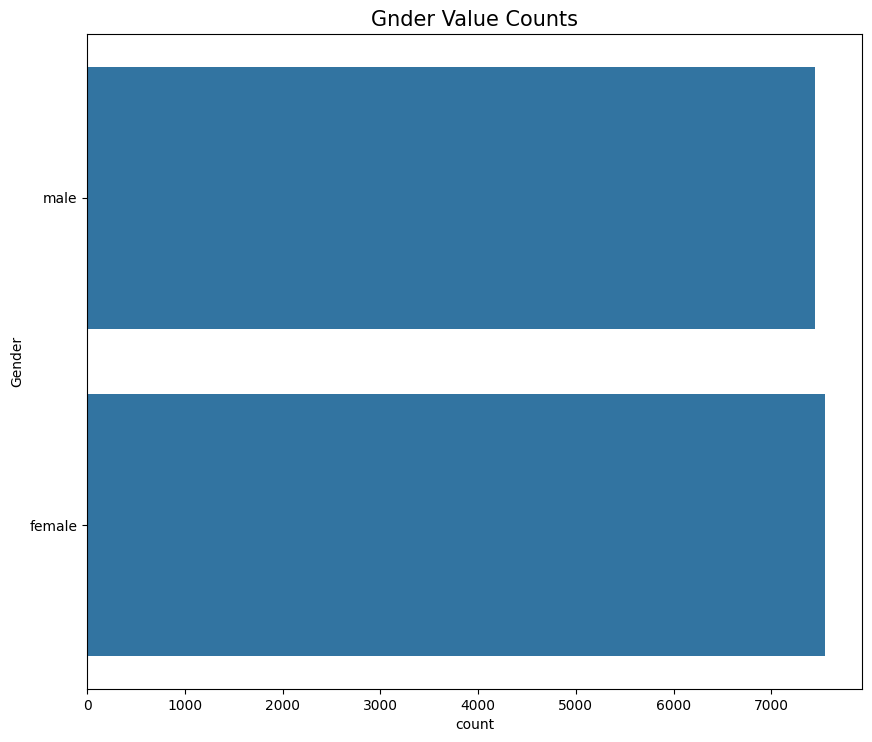

In [20]:
plt.figure(figsize=(10,8.5))
sns.countplot(df_new['Gender'])
plt.title("Gnder Value Counts",size=15)
plt.show()

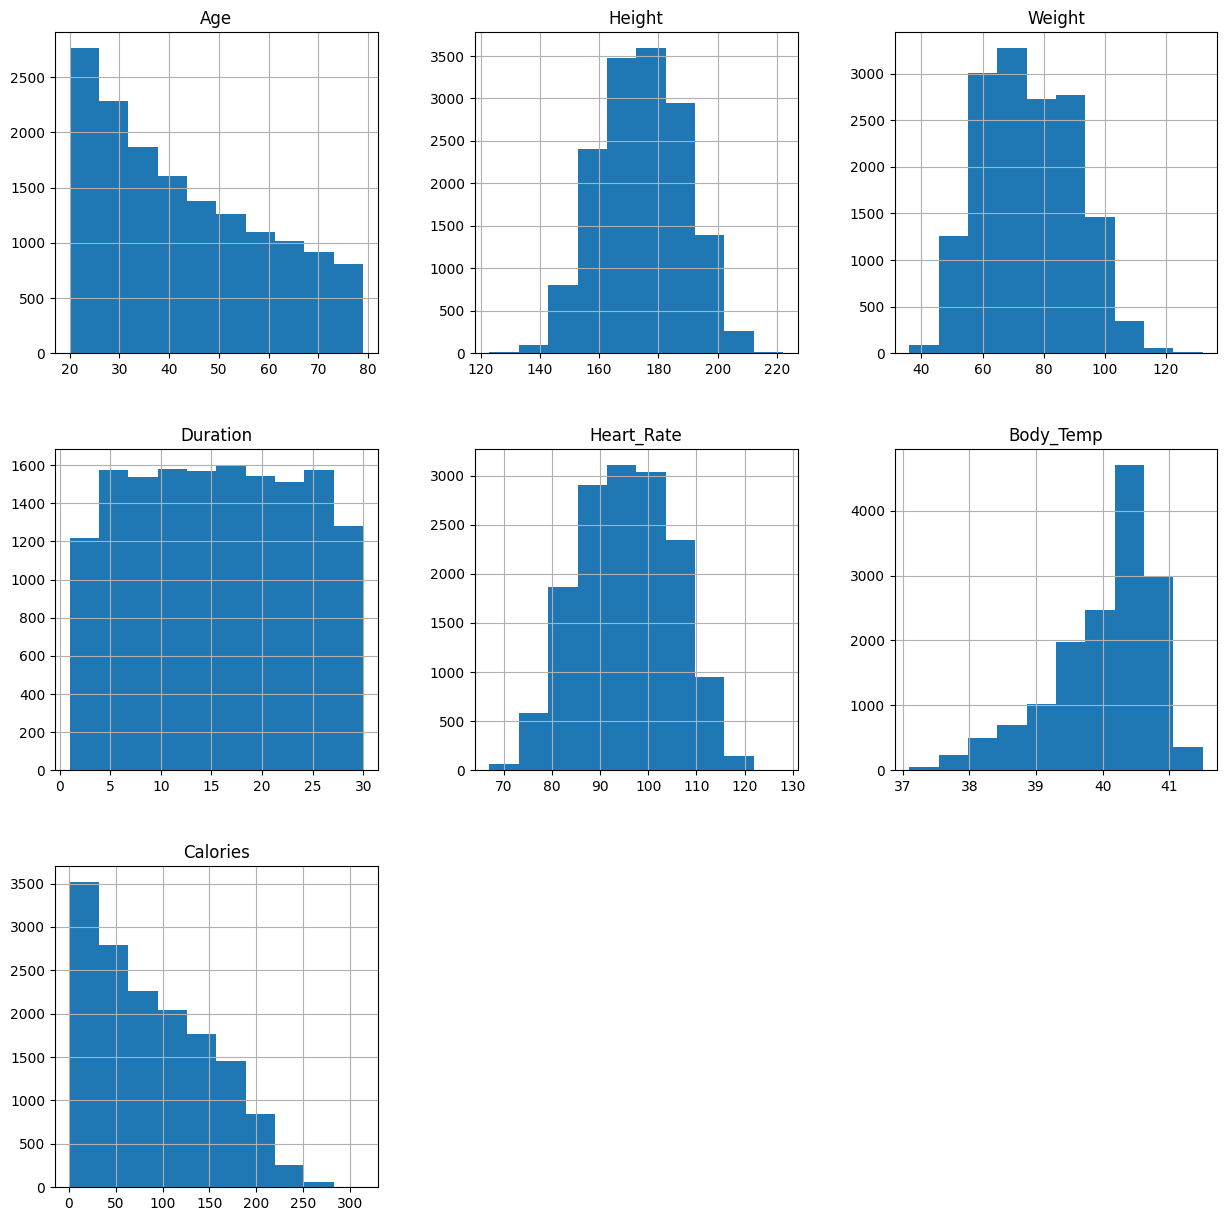

In [21]:
df_new.hist(figsize=(15,15))
plt.show()

<Axes: xlabel='Calories', ylabel='Density'>

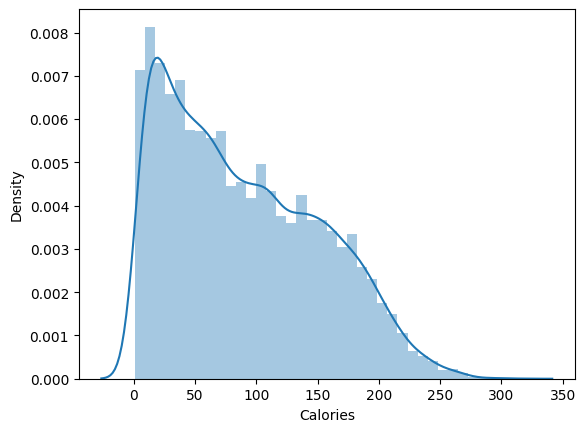

In [22]:
sns.distplot(df_new['Calories'])

### **Outlier Ditection**

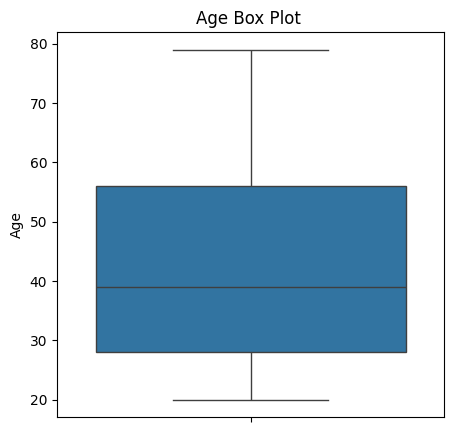

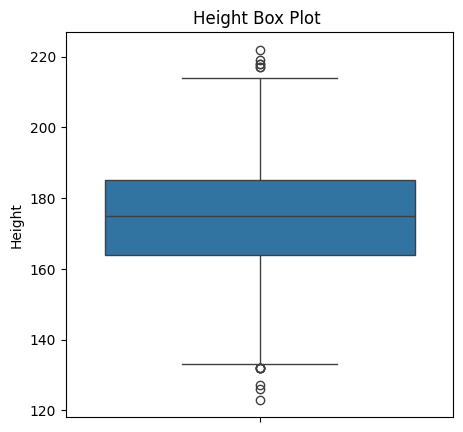

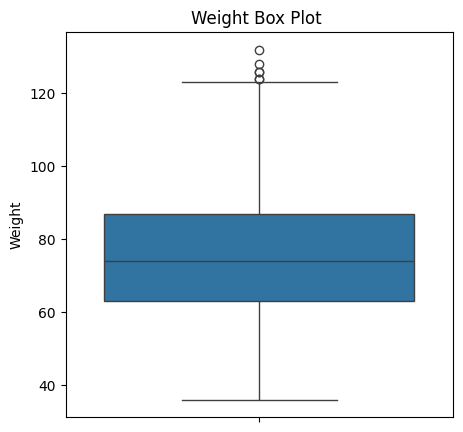

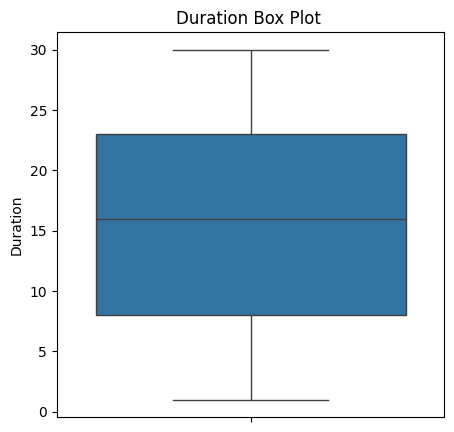

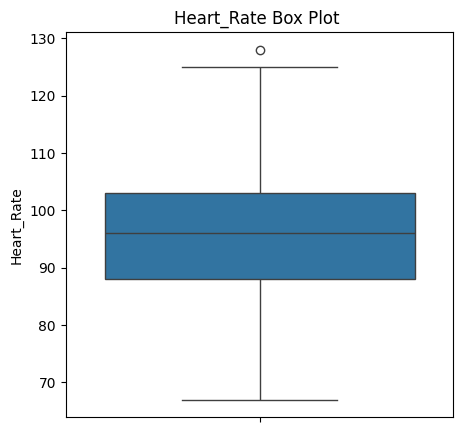

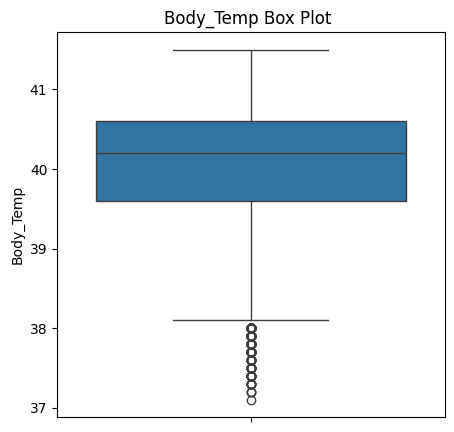

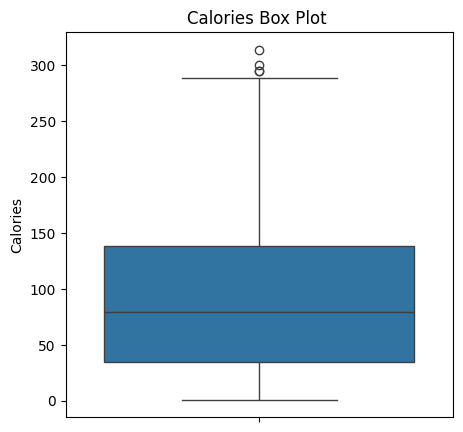

In [23]:
def outliers_check(column):

  title = str(column) + " Box Plot "
  plt.subplots(figsize=(5,5))
  sns.boxplot(data=df_new[str(i)]).set_title(title)
  plt.show()


for i in df_new[['Age',	'Height',	'Weight',	'Duration',	'Heart_Rate', 'Body_Temp',	'Calories']].columns:

    outliers_check(i)

## **Outliers In Detailed**

In [24]:
df_new[(df_new['Height'] < 130.0) | (df_new['Height'] > 215.0)  ]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
1464,male,51,217.0,118.0,4.0,85.0,39.1,19.0
4200,female,63,123.0,40.0,9.0,97.0,39.9,55.0
6226,female,58,127.0,40.0,29.0,102.0,40.8,189.0
6711,male,40,218.0,132.0,1.0,88.0,37.8,5.0
7774,female,30,126.0,39.0,25.0,104.0,40.7,156.0
10362,male,22,222.0,128.0,6.0,84.0,39.3,20.0
12189,male,21,219.0,126.0,15.0,97.0,40.4,78.0
12360,male,41,218.0,119.0,18.0,85.0,40.2,76.0
13276,male,55,217.0,126.0,17.0,91.0,40.4,101.0


In [25]:
df_new[df_new['Weight'] > 130.0]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
6711,male,40,218.0,132.0,1.0,88.0,37.8,5.0


In [26]:
df_new[df_new['Calories'] > 300.0]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
428,male,75,199.0,103.0,28.0,123.0,40.5,314.0


In [27]:
df_new[df_new['Heart_Rate'] > 125.0]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
9981,male,32,188.0,91.0,30.0,128.0,40.9,289.0


In [28]:
df_new[df_new['Body_Temp'] < 38.1]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
10,female,36,177.0,76.0,1.0,74.0,37.8,3.0
24,male,48,182.0,85.0,1.0,80.0,37.7,3.0
49,male,48,152.0,59.0,2.0,79.0,38.0,5.0
232,male,45,195.0,99.0,2.0,83.0,37.9,7.0
301,female,31,169.0,69.0,1.0,74.0,37.6,3.0
...,...,...,...,...,...,...,...,...
14732,male,44,175.0,74.0,1.0,74.0,37.9,2.0
14749,male,70,150.0,59.0,1.0,80.0,37.9,4.0
14753,male,22,202.0,100.0,2.0,81.0,38.0,5.0
14894,male,48,173.0,77.0,2.0,81.0,38.0,6.0


In [29]:
label = LabelEncoder()

df_new['Gender'] = label.fit_transform(df_new['Gender'])
df_new.head(10)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0
5,0,36,151.0,50.0,23.0,96.0,40.7,123.0
6,0,33,158.0,56.0,22.0,95.0,40.5,112.0
7,1,41,175.0,85.0,25.0,100.0,40.7,143.0
8,1,60,186.0,94.0,21.0,97.0,40.4,134.0
9,0,26,146.0,51.0,16.0,90.0,40.2,72.0


## After Labeled

## *1-----> Male*
## *0-----> Female*

## **Correlation Between Attributes**

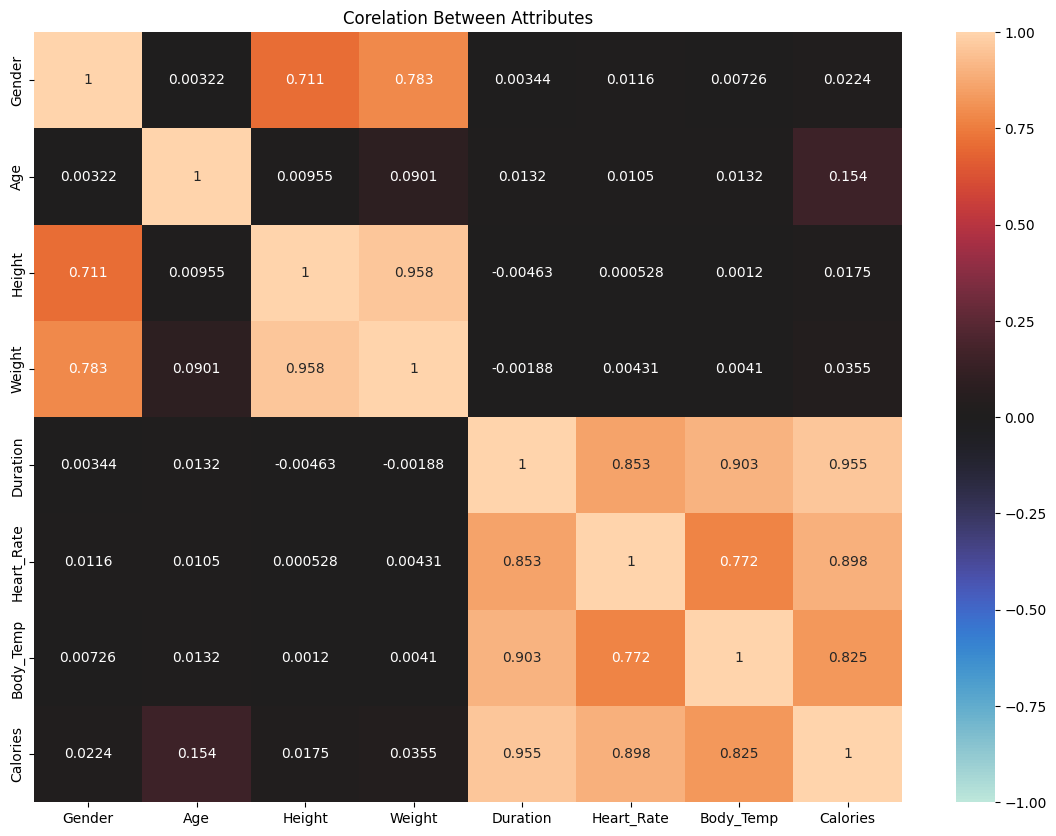

In [30]:
plt.subplots(figsize = (14,10))
sns.heatmap(df_new.corr(),
            annot=True,fmt='.3g', vmin=-1, vmax=1, center= 0).set_title("Corelation Between Attributes")
plt.show()

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_x = df_new[['Gender', 'Age',	'Height',	'Weight',	'Duration',	'Heart_Rate',	'Body_Temp']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_x .columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_x.values, i)
                          for i in range(len(vif_x.columns))]

vif_data

,feature,VIF
0,Gender,5.594581
1,Age,8.212611
2,Height,2036.722981
3,Weight,463.577840
4,Duration,14.053423
5,Heart_Rate,362.037997
6,Body_Temp,1067.014525


### **Gender vs Height**

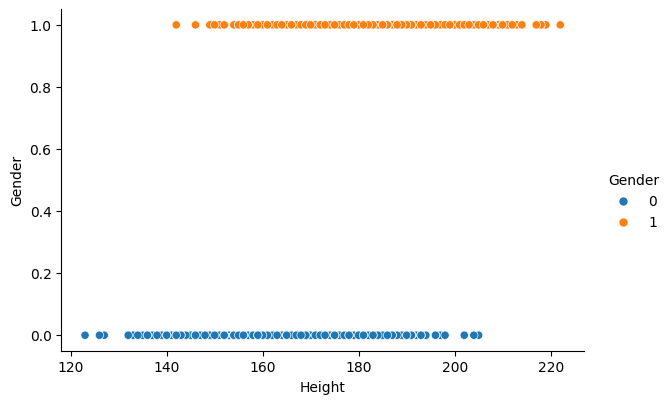

In [32]:
pl=sns.relplot(x='Height',y='Gender',data=df_new,hue='Gender')
pl.fig.set_size_inches(7,4)
plt.show()

### **Gender vs weight**

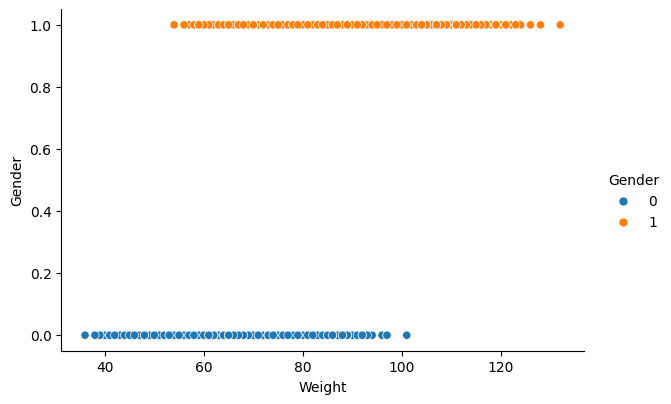

In [33]:
pl=sns.relplot(x='Weight',y='Gender',data=df_new,hue='Gender')
pl.fig.set_size_inches(7,4)
plt.show()

### **Height vs Calories vs Gender**

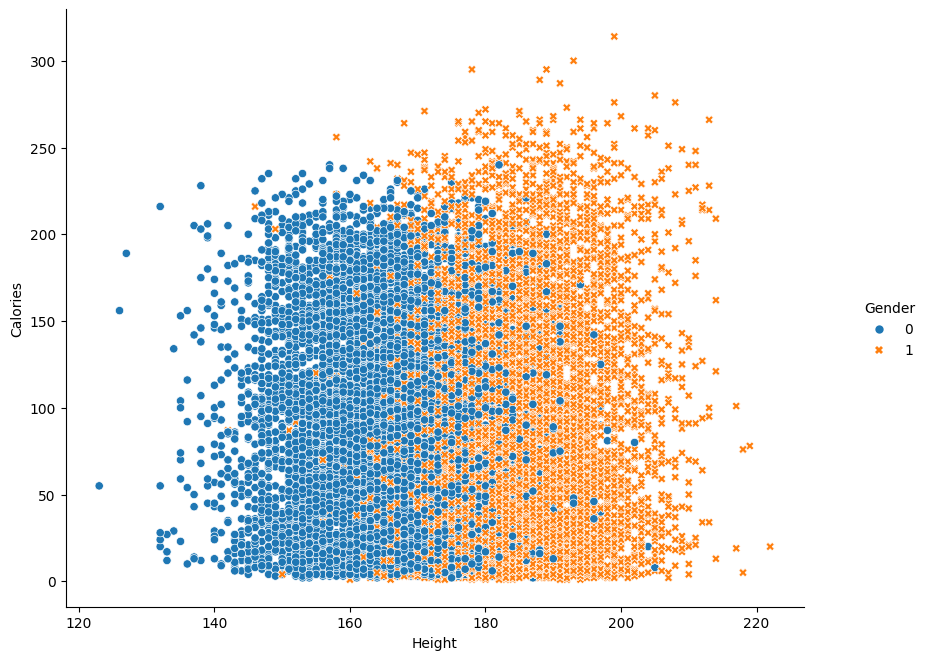

In [34]:
pl=sns.relplot(x='Height',y='Calories',data=df_new,hue='Gender',style='Gender')
pl.fig.set_size_inches(10,7)
plt.show()

### **Weight vs Calories vs Gender**

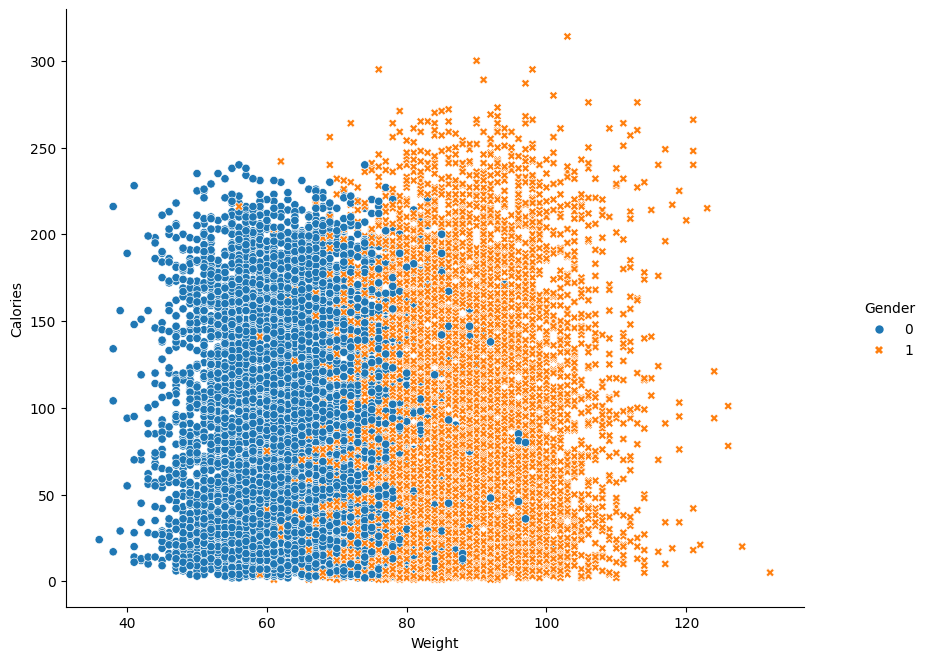

In [35]:
pl=sns.relplot(x='Weight',y='Calories',data=df_new,hue='Gender',style='Gender')
pl.fig.set_size_inches(10,7)
plt.show()

### **Age vs Calories vs Gender**

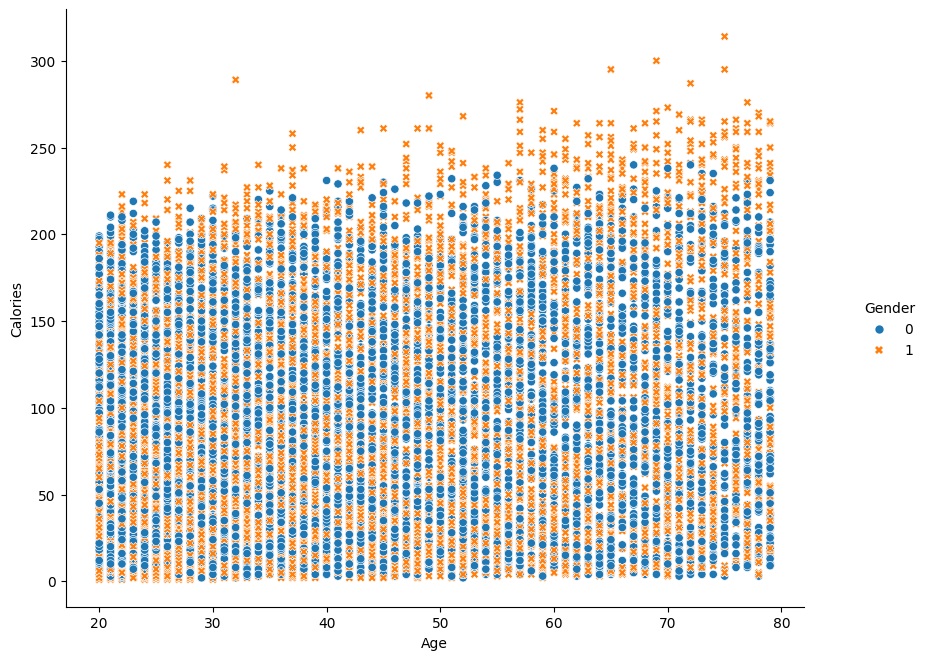

In [36]:
pl=sns.relplot(x='Age',y='Calories',data=df_new,hue='Gender',style='Gender')
pl.fig.set_size_inches(10,7)
plt.show()

### **Duration vs Calories vs Gender**

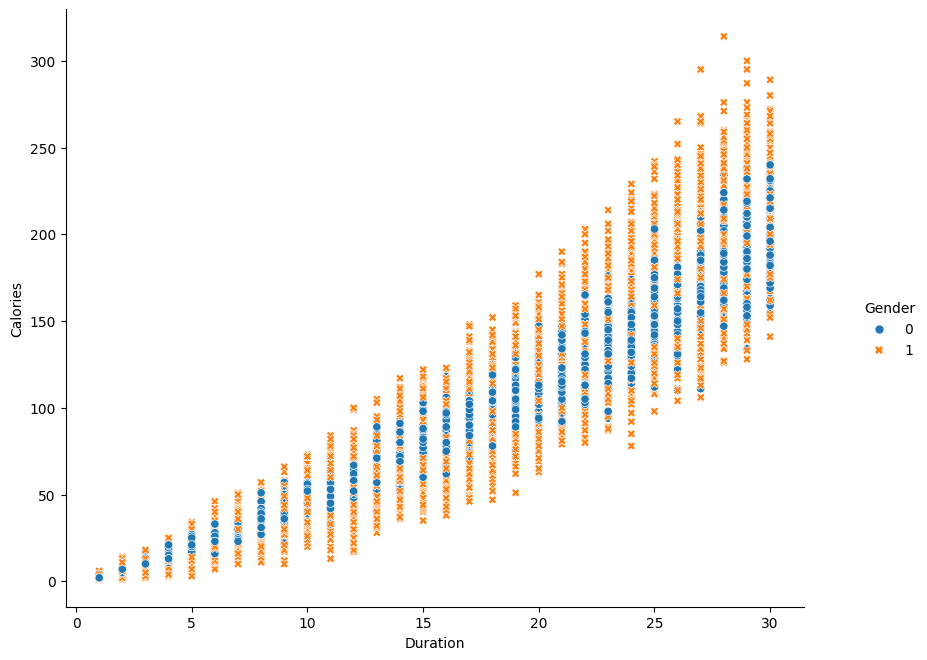

In [37]:
pl=sns.relplot(x='Duration',y='Calories',data=df_new,hue='Gender',style='Gender')
pl.fig.set_size_inches(10,7)
plt.show()

### **Heart Rate vs Calories vs Gender**

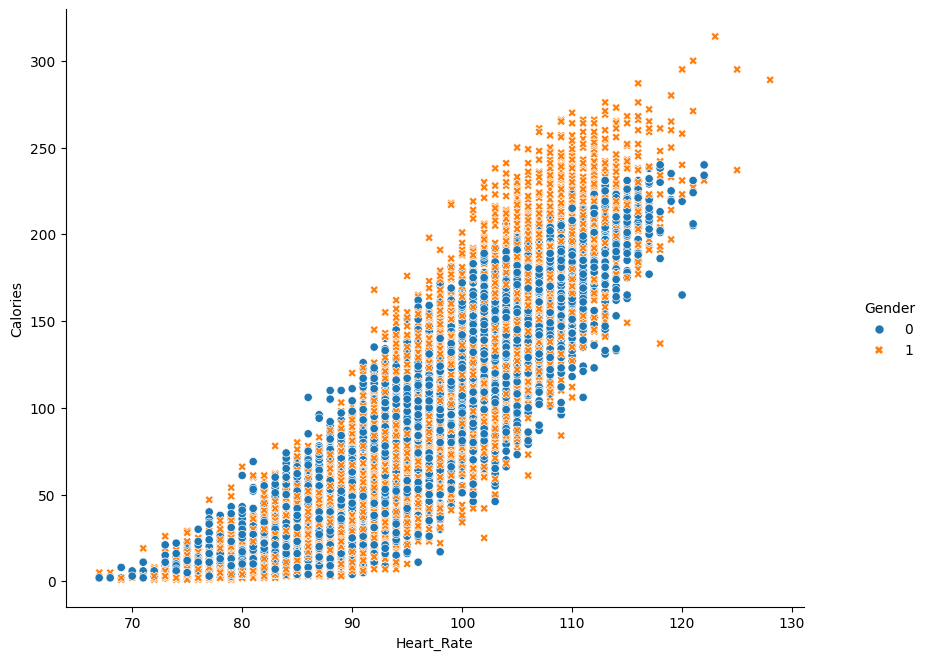

In [38]:
pl=sns.relplot(x='Heart_Rate',y='Calories',data=df_new,hue='Gender',style='Gender')
pl.fig.set_size_inches(10,7)
plt.show()

### **Body Temperature vs Calories vs Gender**

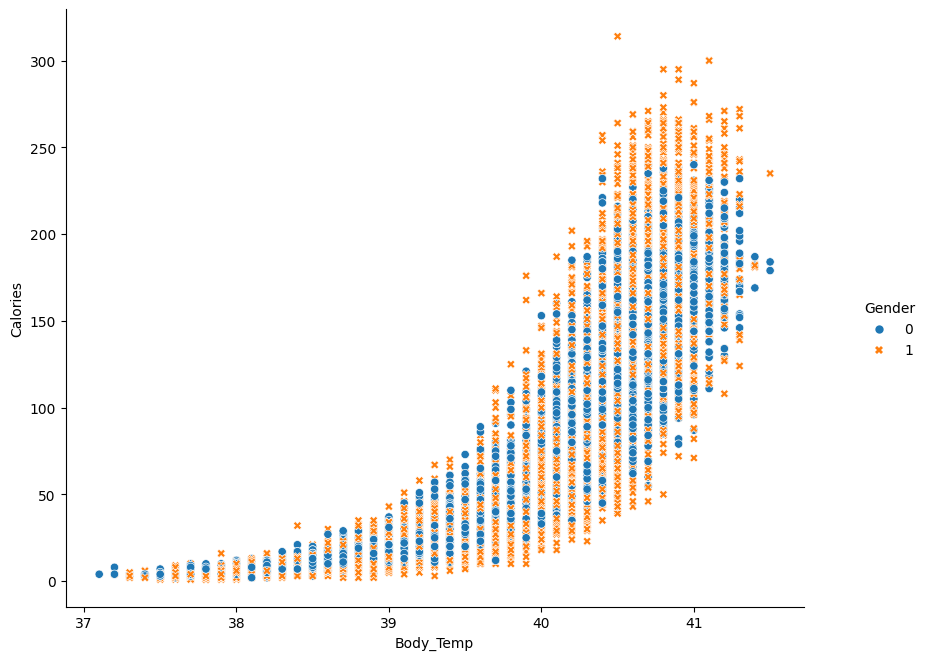

In [39]:
pl=sns.relplot(x='Body_Temp',y='Calories',data=df_new,hue='Gender',style='Gender')
pl.fig.set_size_inches(10,7)
plt.show()

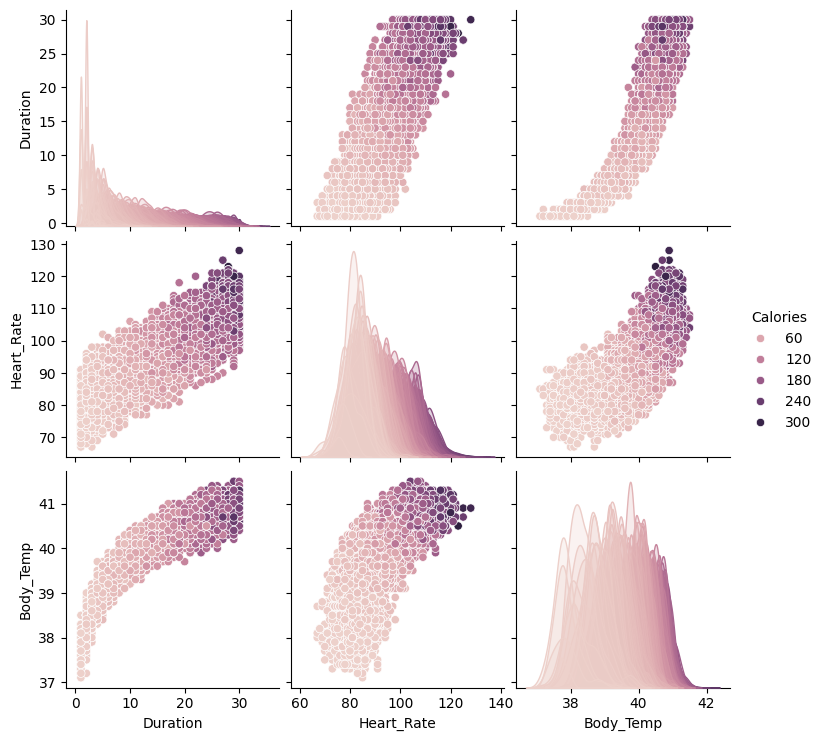

In [40]:
sns.pairplot(df_new[['Duration','Heart_Rate', 'Body_Temp','Calories']],hue="Calories")

### **Outlier Handling**

In [41]:
df_ot_hnd = pd.DataFrame(df_new[~((df_new['Height'] < 130.0) | (df_new['Height'] > 215.0))])

In [42]:
df_ot_hnd.shape

(14991, 8)

In [43]:
df_ot_hnd = pd.DataFrame(df_ot_hnd[~(df_ot_hnd['Calories'] > 300.0)])

In [44]:
df_ot_hnd.shape

(14990, 8)

In [45]:
df_ot_hnd = pd.DataFrame(df_ot_hnd[~(df_ot_hnd['Heart_Rate'] > 125.0)])

In [46]:
df_ot_hnd.shape

(14989, 8)

In [47]:
df_ot_hnd = pd.DataFrame(df_ot_hnd[~(df_ot_hnd['Calories'] > 220.0)])
df_ot_hnd.shape

(14674, 8)

### **Outliers Handaled Dataset**

In [48]:
df_ot_hnd.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0
5,0,36,151.0,50.0,23.0,96.0,40.7,123.0


In [49]:
df_ot_hnd.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,14674.0,0.488210,0.499878,0.0,0.0,0.0,1.0,1.0
Age,14674.0,42.389055,16.825543,20.0,28.0,39.0,55.0,79.0
Height,14674.0,174.264754,14.173897,132.0,164.0,174.0,185.0,214.0
Weight,14674.0,74.692926,14.905706,36.0,63.0,74.0,86.0,124.0
Duration,14674.0,15.254396,8.186395,1.0,8.0,15.0,22.0,30.0
Heart_Rate,14674.0,95.163009,9.347717,67.0,88.0,95.0,102.0,121.0
Body_Temp,14674.0,40.007489,0.777050,37.1,39.6,40.2,40.6,41.5
Calories,14674.0,86.302780,59.010031,1.0,34.0,77.0,133.0,220.0


### **Data Pre Processing**

In [50]:
y = df_ot_hnd['Calories']
x = df_ot_hnd.drop(['Calories'],axis=1)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [52]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## **Multiple Linear Regression Model**

---

### **Fit Model**

In [53]:
model_1 = LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

### **Training Score**

In [54]:
model1_training_score =  model_1.score(x_train,y_train)
print(f'model_1 Training Score : {model1_training_score} ')

model_1 Training Score : 0.9723924075401532 


In [55]:
print(f'Model 1 Coefficient : {model_1.coef_}')
print("-----------------------------------------------------")
print(f'Model 1 Coefficient : {model_1.intercept_}')

Model 1 Coefficient : [ -1.02952831   7.50025232  -2.14545045   3.49171016  52.91489719
  17.08175945 -11.71001917]
-----------------------------------------------------
Model 1 Coefficient : 85.81272149023165


### **Testing Score**

In [56]:
model1_testing_score =  model_1.score(x_test,y_test)
print(f'model_1 Testing Score : {model1_testing_score} ')

model_1 Testing Score : 0.9730065206330201 


In [57]:
y_predict = model_1.predict(x_test)

df_predictict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

In [58]:
df_predictict.sample(10)

,Actual,Predicted
11061,14.0,17.931255
9454,180.0,186.119049
6286,31.0,35.026203
4172,92.0,109.509413
2462,18.0,14.599309
11054,54.0,48.188949
4752,68.0,62.714819
1603,147.0,151.274091
11550,185.0,186.584432
10576,53.0,56.520712


In [59]:
df_predictict['Eror'] = df_predictict['Actual'] - df_predictict['Predicted']

df_predictict.head(10)

,Actual,Predicted,Eror
2456,158.0,157.092716,0.907284
12179,180.0,173.580499,6.419501
10548,157.0,161.671909,-4.671909
10982,67.0,77.932471,-10.932471
10935,18.0,15.185355,2.814645
13860,35.0,34.320979,0.679021
2957,188.0,170.724438,17.275562
13458,150.0,158.957193,-8.957193
9240,28.0,25.570933,2.429067
11469,31.0,34.141749,-3.141749


### **Model Evaluation**

In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 7.402474442146024
Mean Squared Error: 95.8424815110856
Root Mean Squared Error: 9.789917339338754


In [61]:
r2_score(y_test,y_predict)

0.9730065206330201

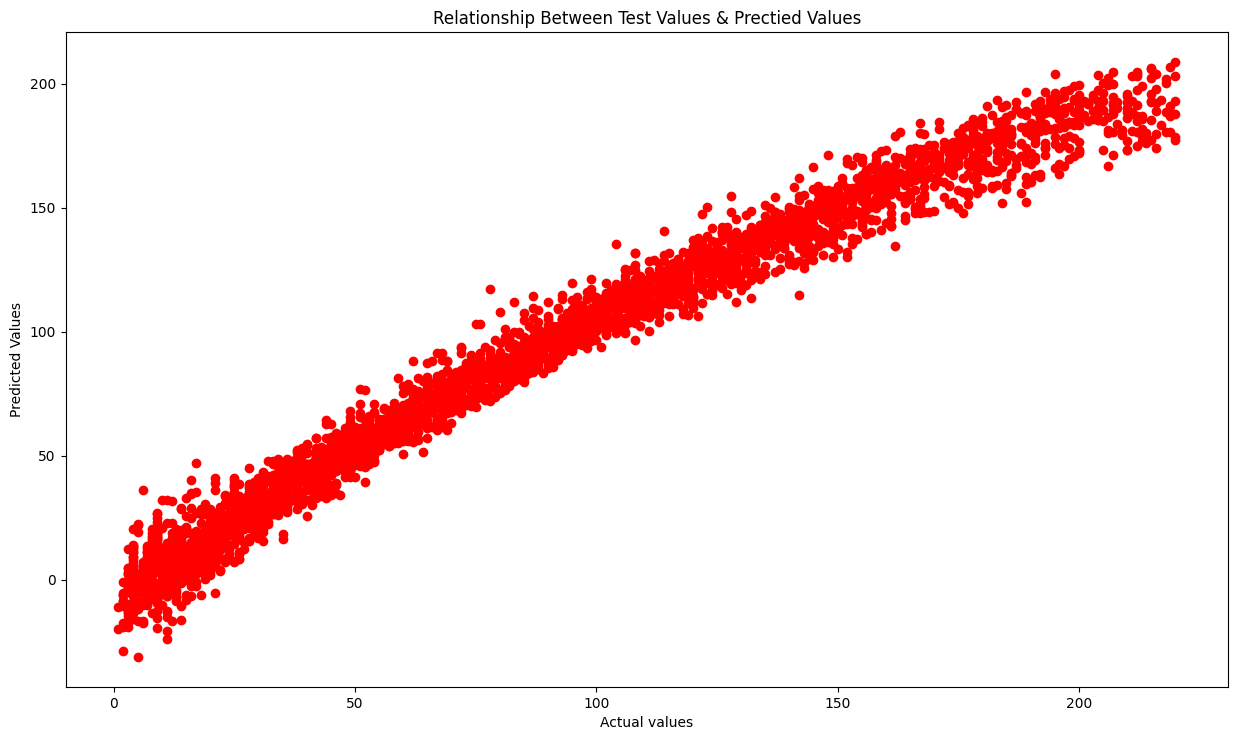

In [62]:
plt.figure(figsize=(15,8.5))

plt.scatter(y_test,y_predict, color='red')
#plt.plot(y_predict,y_test,color='black')

plt.title('Relationship Between Test Values & Prectied Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

---

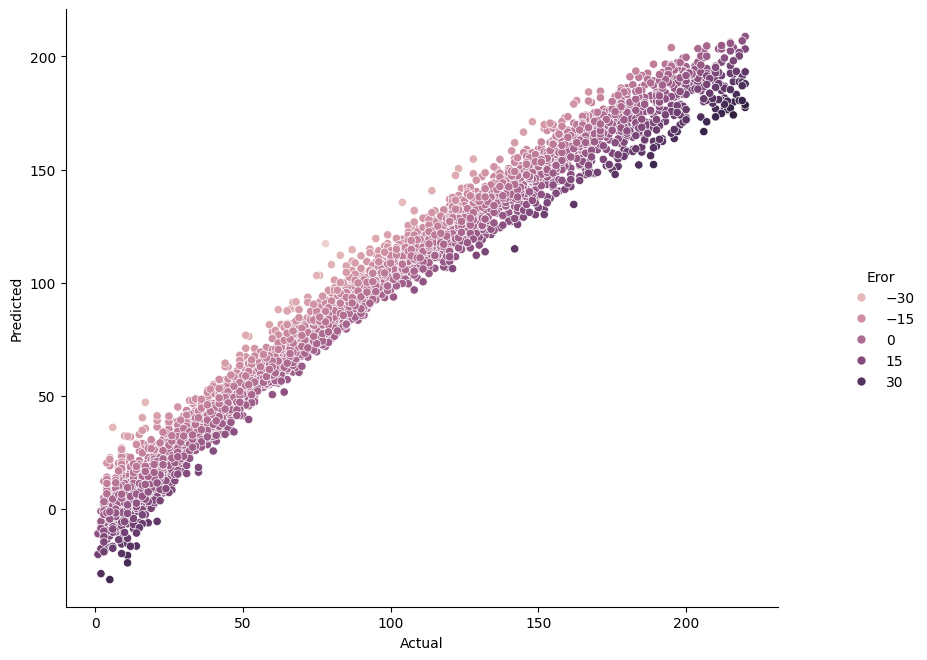

In [63]:
pl=sns.relplot(x='Actual',y='Predicted',data=df_predictict,hue='Eror')
pl.fig.set_size_inches(10,7)
plt.show()

## **XG Boost Regressior**

---

### **Model Building**

In [64]:
model_2 = XGBRegressor()
model_2.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### **Training Score**

In [65]:
model_2_training_score = model_2.score(x_train,y_train)
print(f'model_2 Training Score : {model_2_training_score}')

model_2 Training Score : 0.9995790972883314


### **Model Evaluation**

---

### **Testing Score**

In [66]:
model_2_testing_score = model_2.score(x_test,y_test)
print(f'model_2 Testing Score : {model_2_testing_score}')

model_2 Testing Score : 0.9987832679523541


In [67]:
y_predict_2 = model_2.predict(x_test)

df_predictict_2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_2})
df_predictict_2.sample(10)

,Actual,Predicted
8740,20.0,20.729258
5601,87.0,84.110344
11693,51.0,50.215931
14331,146.0,147.447327
2061,205.0,204.754303
10025,35.0,35.265728
4692,39.0,40.029755
2132,204.0,204.051559
11652,25.0,24.997280
7392,177.0,178.597260


In [68]:
df_predictict_2['Eror'] = df_predictict_2['Actual'] - df_predictict_2['Predicted']

df_predictict_2.sample(10)

,Actual,Predicted,Eror
2884,158.0,162.130859,-4.130859
7720,130.0,131.694183,-1.694183
3531,6.0,5.612454,0.387546
5037,183.0,182.256042,0.743958
2456,158.0,153.062866,4.937134
9064,118.0,115.958923,2.041077
11261,117.0,117.255859,-0.255859
13631,202.0,204.479141,-2.479141
8580,103.0,103.627602,-0.627602
13685,68.0,65.366272,2.633728


In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_2)))

Mean Absolute Error: 1.4547185781672007
Mean Squared Error: 4.320103281057563
Root Mean Squared Error: 2.078485814495149


In [70]:
r2_score(y_test,y_predict_2)

0.9987832679523541

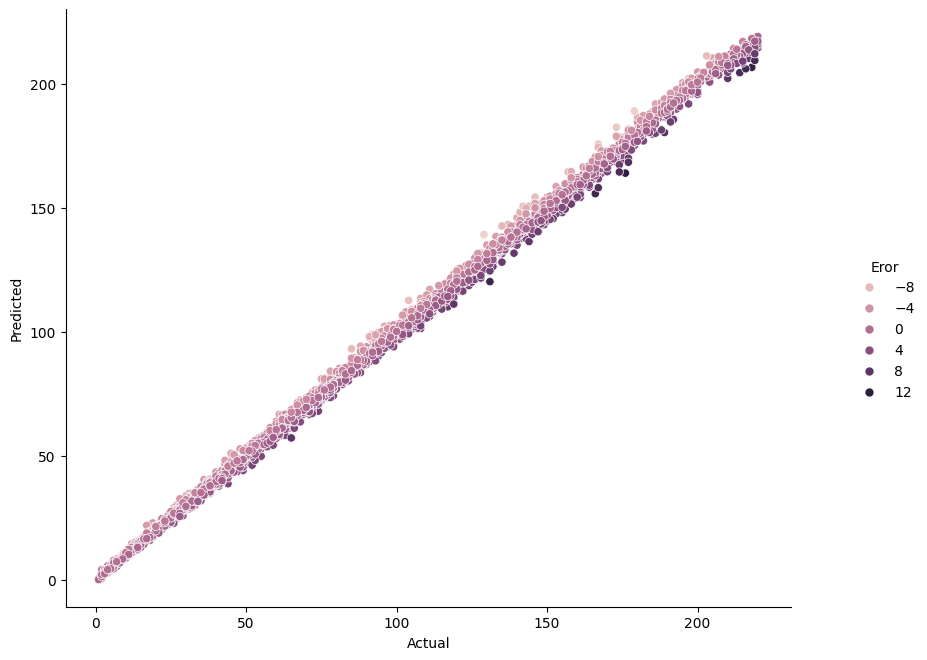

In [71]:
pl=sns.relplot(x='Actual',y='Predicted',data=df_predictict_2,hue='Eror')
pl.fig.set_size_inches(10,7)
plt.show()

### **Predict With Random Data**

In [72]:
input_data = ['0',	'27',	'154.0',	'58.0',	'10.0',	'81.0',	'39.8']

input_array = np.asarray(input_data)
input_array_reshape = input_array.reshape(1,-1)


sc_2 = StandardScaler()
cal_x = sc.transform(input_array_reshape)

Caloiries_pred =  model_2.predict(cal_x)
print(Caloiries_pred)



[34.20002]


### **Save Model as Pickle File**

In [73]:
import pickle

with open('Calories_model','wb') as f:
  pickle.dump(model_2,f)